# <center><font color=maroon>Image Classification Using CNN Model and Data Augmentation</font></center>


### In this Notebook, a very powerful technique, `image augmentation`, is applied to help improve the CNN performance.

## The Cats & Dogs Dataset

* #### You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats
* #### Download train.zip and unzip the 25000 files and move them to a folder and make a note of the file path

### Import Toolsets

In [16]:
import os, itertools 
import time
import random, shutil  # shutil is a utility for file system operations
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
%matplotlib inline

### Import TensorFlow and Keras

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

### Load CNN Modules

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Image Preprocessing tool

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

<a name='1'></a>
## <font color= blue> Load and Process the Dataset</font>

### The data files are stored in the following sub-directory structure:
<img src="./images/train_test_dir.png" alt="Drawing" style="width: 200px;"/>

### Use Keras ImageDataGenerator API to create image data pipeline, including `image augmentation`

In [20]:
# The root data directory
train_sub_path = './cat_dog_6000'

In [21]:
# Create data generator w/ image augmentation

datagen = ImageDataGenerator(
           rescale=1.0/255.0,
           rotation_range=15,
           width_shift_range=0.1,
           height_shift_range=0.1,
           zoom_range=0.2,
           horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_data = datagen.flow_from_directory(train_sub_path + '/train',
            class_mode='binary', batch_size=64, target_size=(64, 64))

val_data = val_datagen.flow_from_directory(train_sub_path + '/validation',
           class_mode='binary', batch_size=64, target_size=(64, 64))

test_data = val_datagen.flow_from_directory(train_sub_path + '/test',
            class_mode='binary', batch_size=64, target_size=(64, 64))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


<a name='3'></a>
## <font color= blue> Image Data Augmentation </font>

<a name='3-1'></a>
### <font color=blue> Define the CNN Model (VGG-5) </font> 

In [23]:
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# FC Layers
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

<a name='2-2'></a>
### <font color=blue> Train and Fit and Model </font>

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_data, epochs=10, validation_data = val_data, verbose=1)

Epoch 1/10
47/47 [==============================] - 13s 278ms/step - loss: 0.4344 - accuracy: 0.8020 - val_loss: 0.4723 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 13s 277ms/step - loss: 0.4222 - accuracy: 0.8043 - val_loss: 0.5215 - val_accuracy: 0.7610
Epoch 3/10
47/47 [==============================] - 13s 272ms/step - loss: 0.4081 - accuracy: 0.8153 - val_loss: 0.4511 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 12s 256ms/step - loss: 0.4056 - accuracy: 0.8160 - val_loss: 0.5077 - val_accuracy: 0.7690
Epoch 5/10
47/47 [==============================] - 12s 246ms/step - loss: 0.4055 - accuracy: 0.8173 - val_loss: 0.4541 - val_accuracy: 0.8050
Epoch 6/10
47/47 [==============================] - 11s 242ms/step - loss: 0.3995 - accuracy: 0.8147 - val_loss: 0.4398 - val_accuracy: 0.8090
Epoch 7/10
47/47 [==============================] - 11s 228ms/step - loss: 0.4124 - accuracy: 0.8070 - val_loss: 0.4477 - val_accuracy: 0.7910

### Compare Loss and Accuracy Performance for train and validation data

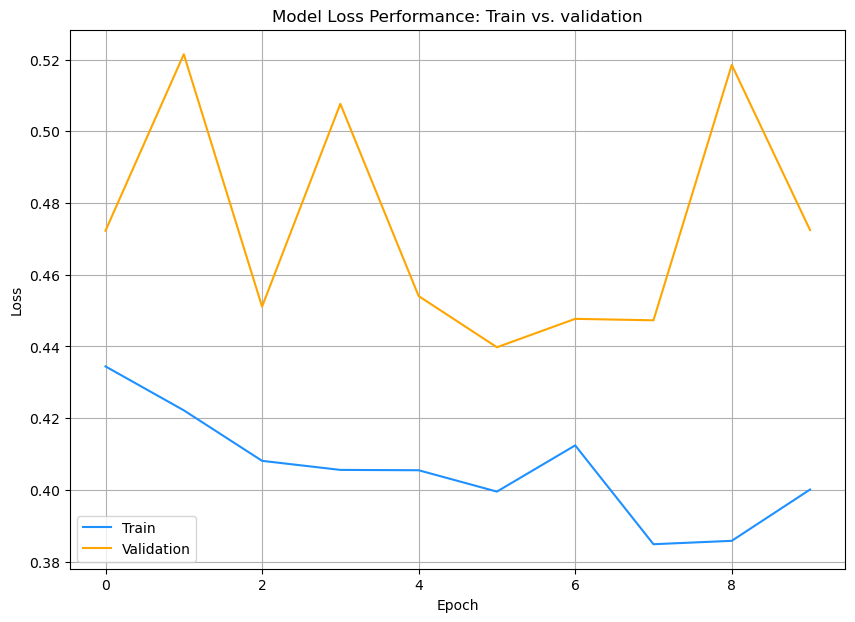

In [27]:
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']

plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

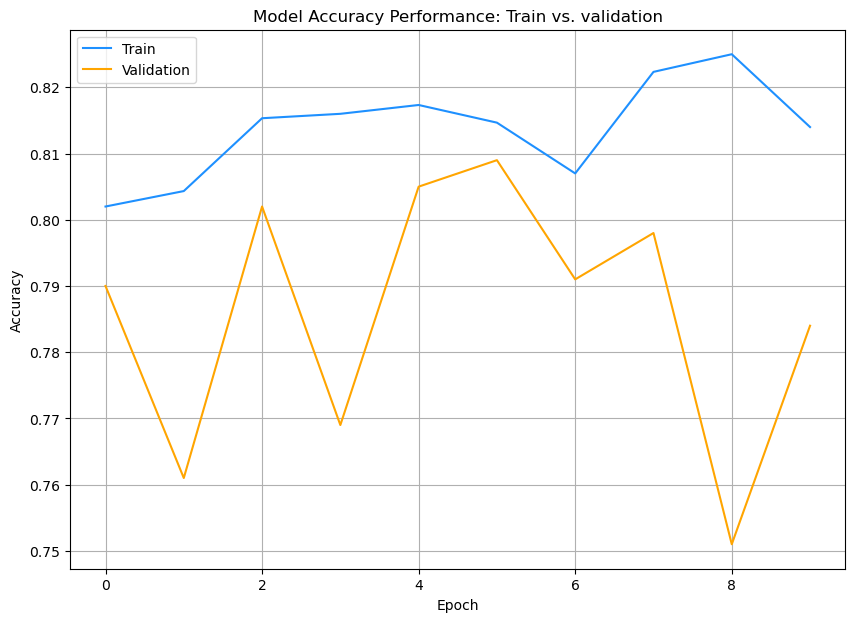

In [28]:
accu = history.history['accuracy']  # Loss data for Training 
accu_val = history.history['val_accuracy']

plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

#### <font color=maroon> Notice that the accuracy on train data continues to improve till it reaches 100%. </font>
####  <font color=maroon>However, the accuracy on the validation data plateaus at `85% after 50 epoch`.</font>

<a name='2-3'></a>
### <font color=blue> Test and Evaluate the Model </font>

In [29]:
loss, accuracy = model.evaluate(test_data, verbose=1)

y_pred = model.predict(test_data)

32/32 [==============================] - 4s 120ms/step


#### <font color=maroon> Evaluation on the test data confirms the accuracy is `80.8%`. It's better than the VGG-5 only model.</font> 

### Predicted target output, Y (Cat or Dog)

In [30]:
Y_pred = np.rint(y_pred)    # Binary decision on the image. 1 = Dog, 0 = Cat

y_pred[0], Y_pred[0]

(array([0.9179298], dtype=float32), array([1.], dtype=float32))